# Social ComQuant Summer School 2022 - Data Collection

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import time
import json

## Authentication

In [2]:
with open("bearer_token.txt") as f:
    bearer_token = f.read()

In [3]:
client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

## Get Tweet Counts

In [4]:
kilicdaroglu_query = f"""(kemal OR kilicdaroglu OR kilicdar OR "kemal kilicdaroglu") (aday OR adayi OR adaylik OR adayligi) lang:tr -is:retweet"""
mansur_yavas_query = f"""(mansur OR yavas OR "mansur yavas") (aday OR adayi OR adaylik OR adayligi) lang:tr -is:retweet"""
imamoglu_query = f"""(ekrem OR imamoglu OR "ekrem imamoglu") (aday OR adayi OR adaylik OR adayligi) lang:tr -is:retweet"""

In [5]:
def get_tweet_counts(client, query, start_time, end_time):
    counts = client.get_all_tweets_count(query=query, granularity='day',
                                         start_time=start_time, end_time=end_time)
    
    df = pd.DataFrame(counts.data)
    df = df[["start", "tweet_count"]]
    df["start"] = pd.to_datetime(df["start"]).dt.date
    df.rename({"start":"date"}, axis=1, inplace=True)
    df["query"] = query
    return df

In [6]:
def date_formatter(time):
    return f"{'T'.join(str(time).split())}Z"

In [7]:
dates = pd.date_range(start="2021/07/01", end="2022/07/25", freq="D")

In [8]:
print(f"Date range: 2021/07/01 - 2022/07/25")
print(f"Total number of days: {len(dates)}")

Date range: 2021/07/01 - 2022/07/25
Total number of days: 390


In [9]:
kilicdaroglu_tweet_counts = pd.DataFrame(columns=["date", "tweet_count", "query"])
mansur_tweet_counts = pd.DataFrame(columns=["date", "tweet_count", "query"])
imamoglu_tweet_counts = pd.DataFrame(columns=["date", "tweet_count", "query"])

In [10]:
for i in range(len(dates)-1):
    time.sleep(3)
    if i % 15 == 0:
        print(f"{i}/{len(dates)} | {i/len(dates)*100:.2f}%")
    
    start_time = dates[i]
    end_time = dates[i+1]
    
    kilicdaroglu_tweet_counts = kilicdaroglu_tweet_counts.append(get_tweet_counts(client=client, query=kilicdaroglu_query, start_time=start_time, end_time=end_time), ignore_index=True)

print(f"{len(dates)}/{len(dates)} | {len(dates)/len(dates)*100:.2f}%")

0/390 | 0.00%
15/390 | 3.85%
30/390 | 7.69%
45/390 | 11.54%
60/390 | 15.38%
75/390 | 19.23%
90/390 | 23.08%
105/390 | 26.92%
120/390 | 30.77%
135/390 | 34.62%
150/390 | 38.46%
165/390 | 42.31%
180/390 | 46.15%
195/390 | 50.00%
210/390 | 53.85%
225/390 | 57.69%
240/390 | 61.54%
255/390 | 65.38%
270/390 | 69.23%
285/390 | 73.08%
300/390 | 76.92%
315/390 | 80.77%
330/390 | 84.62%
345/390 | 88.46%
360/390 | 92.31%
375/390 | 96.15%
390/390 | 100.00%


In [11]:
for i in range(len(dates)-1):
    time.sleep(3)
    if i % 15 == 0:
        print(f"{i}/{len(dates)} | {i/len(dates)*100:.2f}%")
    
    start_time = dates[i]
    end_time = dates[i+1]
    
    mansur_tweet_counts = mansur_tweet_counts.append(get_tweet_counts(client=client, query=mansur_yavas_query, start_time=start_time, end_time=end_time), ignore_index=True)

print(f"{len(dates)}/{len(dates)} | {len(dates)/len(dates)*100:.2f}%")

0/390 | 0.00%
15/390 | 3.85%
30/390 | 7.69%
45/390 | 11.54%
60/390 | 15.38%
75/390 | 19.23%
90/390 | 23.08%
105/390 | 26.92%
120/390 | 30.77%
135/390 | 34.62%
150/390 | 38.46%
165/390 | 42.31%
180/390 | 46.15%
195/390 | 50.00%
210/390 | 53.85%
225/390 | 57.69%
240/390 | 61.54%
255/390 | 65.38%
270/390 | 69.23%
285/390 | 73.08%
300/390 | 76.92%
315/390 | 80.77%
330/390 | 84.62%
345/390 | 88.46%
360/390 | 92.31%
375/390 | 96.15%
390/390 | 100.00%


In [12]:
for i in range(len(dates)-1):
    time.sleep(3)
    if i % 15 == 0:
        print(f"{i}/{len(dates)} | {i/len(dates)*100:.2f}%")
    
    start_time = dates[i]
    end_time = dates[i+1]
    
    imamoglu_tweet_counts = imamoglu_tweet_counts.append(get_tweet_counts(client=client, query=imamoglu_query, start_time=start_time, end_time=end_time), ignore_index=True)

print(f"{len(dates)}/{len(dates)} | {len(dates)/len(dates)*100:.2f}%")

0/390 | 0.00%
15/390 | 3.85%
30/390 | 7.69%
45/390 | 11.54%
60/390 | 15.38%
75/390 | 19.23%
90/390 | 23.08%
105/390 | 26.92%
120/390 | 30.77%
135/390 | 34.62%
150/390 | 38.46%
165/390 | 42.31%
180/390 | 46.15%
195/390 | 50.00%
210/390 | 53.85%
225/390 | 57.69%
240/390 | 61.54%
255/390 | 65.38%
270/390 | 69.23%
285/390 | 73.08%
300/390 | 76.92%
315/390 | 80.77%
330/390 | 84.62%
345/390 | 88.46%
360/390 | 92.31%
375/390 | 96.15%
390/390 | 100.00%


In [13]:
print(f"Kemal Kılıçdaroğlu Total Tweet Count: {kilicdaroglu_tweet_counts['tweet_count'].sum()}")
print(f"Kemal Kılıçdaroğlu Average Daily Tweet Count: {kilicdaroglu_tweet_counts['tweet_count'].mean()}")

Kemal Kılıçdaroğlu Total Tweet Count: 150854
Kemal Kılıçdaroğlu Average Daily Tweet Count: 387.7994858611825


In [14]:
print(f"Mansur Yavaş Total Tweet Count: {mansur_tweet_counts['tweet_count'].sum()}")
print(f"Mansur Yavaş Average Daily Tweet Count: {mansur_tweet_counts['tweet_count'].mean()}")

Mansur Yavaş Total Tweet Count: 127589
Mansur Yavaş Average Daily Tweet Count: 327.99228791773777


In [15]:
print(f"Ekrem İmamoğlu Total Tweet Count: {imamoglu_tweet_counts['tweet_count'].sum()}")
print(f"Ekrem İmamoğlu Average Daily Tweet Count: {imamoglu_tweet_counts['tweet_count'].mean()}")

Ekrem İmamoğlu Total Tweet Count: 73431
Ekrem İmamoğlu Average Daily Tweet Count: 188.76863753213368


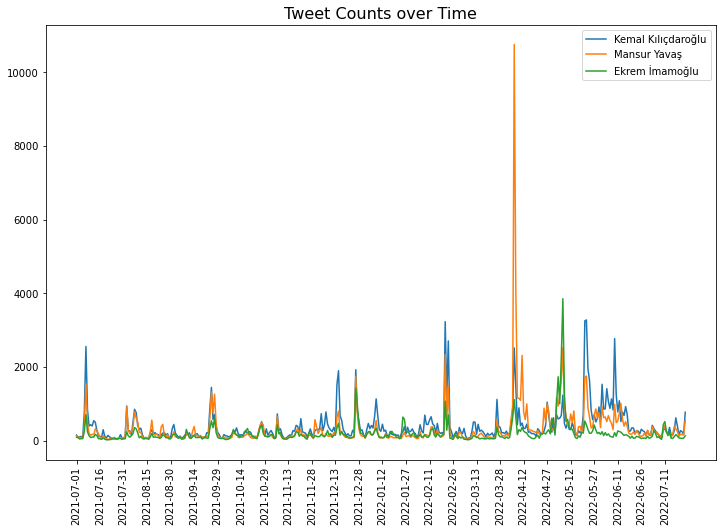

In [16]:
plt.figure(figsize=(12, 8))

plt.plot(kilicdaroglu_tweet_counts["date"], kilicdaroglu_tweet_counts["tweet_count"], label="Kemal Kılıçdaroğlu")
plt.plot(mansur_tweet_counts["date"], mansur_tweet_counts["tweet_count"], label="Mansur Yavaş")
plt.plot(imamoglu_tweet_counts["date"], imamoglu_tweet_counts["tweet_count"], label="Ekrem İmamoğlu")

plt.title("Tweet Counts over Time", fontsize=16)
plt.xticks([str(date) for date in list(kilicdaroglu_tweet_counts["date"])][::15], rotation=90)

plt.legend()

plt.show()

## Download Tweets

In [8]:
def download_tweets(query, start_time, end_time, max_results):

    tweets = client.search_all_tweets(query = query,
                                      expansions = ['author_id', 'referenced_tweets.id', 'referenced_tweets.id.author_id',
                                                    'entities.mentions.username', 'attachments.poll_ids', 'attachments.media_keys',
                                                    'in_reply_to_user_id', 'geo.place_id'],
                                      tweet_fields = ["id", "text", "attachments", "author_id",
                                                      "conversation_id", "created_at", "entities", "geo", "in_reply_to_user_id",
                                                      "lang", "possibly_sensitive", "public_metrics", "referenced_tweets",
                                                      "reply_settings", "source", "withheld"],
                                      start_time = date_formatter(start_time),
                                      end_time = date_formatter(end_time),
                                      max_results=max_results)
    
    return [tweet.data for tweet in tweets.data]

In [11]:
with open("data/tweets_kilicdar.json", "a+") as f:
    total_tweet_count = 0
    for i in range(len(dates)-1):
        time.sleep(3)
        print(f"{i+1}/{len(dates)} | Date Range: {str(dates[i]).split()[0]} - {str(dates[i+1]).split()[0]} | Keyword: kilicdaroglu", end=" | ")
        tweets = []
        
        while not tweets:
            try:
                tweets = download_tweets(query=kilicdaroglu_query, start_time=dates[i], end_time=dates[i+1], max_results=500)
            except:
                time.sleep(30)
                continue
            
        print(f"Tweet Count: {len(tweets)}", end=" | ")
        total_tweet_count += len(tweets)
        print(f"Total Tweet Count: {total_tweet_count}")
        for tweet in tweets:
            f.write(f"{json.dumps(tweet)}\n")

1/390 | Date Range: 2021-07-01 - 2021-07-02 | Keyword: kilicdar | Tweet Count: 125 | Total Tweet Count: 125
2/390 | Date Range: 2021-07-02 - 2021-07-03 | Keyword: kilicdar | Tweet Count: 81 | Total Tweet Count: 206
3/390 | Date Range: 2021-07-03 - 2021-07-04 | Keyword: kilicdar | Tweet Count: 93 | Total Tweet Count: 299
4/390 | Date Range: 2021-07-04 - 2021-07-05 | Keyword: kilicdar | Tweet Count: 90 | Total Tweet Count: 389
5/390 | Date Range: 2021-07-05 - 2021-07-06 | Keyword: kilicdar | Tweet Count: 84 | Total Tweet Count: 473
6/390 | Date Range: 2021-07-06 - 2021-07-07 | Keyword: kilicdar | Tweet Count: 446 | Total Tweet Count: 919
7/390 | Date Range: 2021-07-07 - 2021-07-08 | Keyword: kilicdar | Tweet Count: 450 | Total Tweet Count: 1369
8/390 | Date Range: 2021-07-08 - 2021-07-09 | Keyword: kilicdar | Tweet Count: 443 | Total Tweet Count: 1812
9/390 | Date Range: 2021-07-09 - 2021-07-10 | Keyword: kilicdar | Tweet Count: 358 | Total Tweet Count: 2170
10/390 | Date Range: 2021-07-

76/390 | Date Range: 2021-09-14 - 2021-09-15 | Keyword: kilicdar | Tweet Count: 130 | Total Tweet Count: 13693
77/390 | Date Range: 2021-09-15 - 2021-09-16 | Keyword: kilicdar | Tweet Count: 165 | Total Tweet Count: 13858
78/390 | Date Range: 2021-09-16 - 2021-09-17 | Keyword: kilicdar | Tweet Count: 174 | Total Tweet Count: 14032
79/390 | Date Range: 2021-09-17 - 2021-09-18 | Keyword: kilicdar | Tweet Count: 93 | Total Tweet Count: 14125
80/390 | Date Range: 2021-09-18 - 2021-09-19 | Keyword: kilicdar | Tweet Count: 93 | Total Tweet Count: 14218
81/390 | Date Range: 2021-09-19 - 2021-09-20 | Keyword: kilicdar | Tweet Count: 60 | Total Tweet Count: 14278
82/390 | Date Range: 2021-09-20 - 2021-09-21 | Keyword: kilicdar | Tweet Count: 81 | Total Tweet Count: 14359
83/390 | Date Range: 2021-09-21 - 2021-09-22 | Keyword: kilicdar | Tweet Count: 69 | Total Tweet Count: 14428
84/390 | Date Range: 2021-09-22 - 2021-09-23 | Keyword: kilicdar | Tweet Count: 165 | Total Tweet Count: 14593
85/390

222/390 | Date Range: 2022-02-07 - 2022-02-08 | Keyword: kilicdar | Tweet Count: 205 | Total Tweet Count: 48741
223/390 | Date Range: 2022-02-08 - 2022-02-09 | Keyword: kilicdar | Tweet Count: 486 | Total Tweet Count: 49227
224/390 | Date Range: 2022-02-09 - 2022-02-10 | Keyword: kilicdar | Tweet Count: 440 | Total Tweet Count: 49667
225/390 | Date Range: 2022-02-10 - 2022-02-11 | Keyword: kilicdar | Tweet Count: 429 | Total Tweet Count: 50096
226/390 | Date Range: 2022-02-11 - 2022-02-12 | Keyword: kilicdar | Tweet Count: 483 | Total Tweet Count: 50579
227/390 | Date Range: 2022-02-12 - 2022-02-13 | Keyword: kilicdar | Tweet Count: 491 | Total Tweet Count: 51070
228/390 | Date Range: 2022-02-13 - 2022-02-14 | Keyword: kilicdar | Tweet Count: 451 | Total Tweet Count: 51521
229/390 | Date Range: 2022-02-14 - 2022-02-15 | Keyword: kilicdar | Tweet Count: 401 | Total Tweet Count: 51922
230/390 | Date Range: 2022-02-15 - 2022-02-16 | Keyword: kilicdar | Tweet Count: 194 | Total Tweet Count

368/390 | Date Range: 2022-07-03 - 2022-07-04 | Keyword: kilicdar | Tweet Count: 400 | Total Tweet Count: 97068
369/390 | Date Range: 2022-07-04 - 2022-07-05 | Keyword: kilicdar | Tweet Count: 315 | Total Tweet Count: 97383
370/390 | Date Range: 2022-07-05 - 2022-07-06 | Keyword: kilicdar | Tweet Count: 251 | Total Tweet Count: 97634
371/390 | Date Range: 2022-07-06 - 2022-07-07 | Keyword: kilicdar | Tweet Count: 200 | Total Tweet Count: 97834
372/390 | Date Range: 2022-07-07 - 2022-07-08 | Keyword: kilicdar | Tweet Count: 146 | Total Tweet Count: 97980
373/390 | Date Range: 2022-07-08 - 2022-07-09 | Keyword: kilicdar | Tweet Count: 103 | Total Tweet Count: 98083
374/390 | Date Range: 2022-07-09 - 2022-07-10 | Keyword: kilicdar | Tweet Count: 84 | Total Tweet Count: 98167
375/390 | Date Range: 2022-07-10 - 2022-07-11 | Keyword: kilicdar | Tweet Count: 284 | Total Tweet Count: 98451
376/390 | Date Range: 2022-07-11 - 2022-07-12 | Keyword: kilicdar | Tweet Count: 299 | Total Tweet Count:

In [12]:
with open("data/tweets_mansur_yavas.json", "a+") as f:
    total_tweet_count = 0
    for i in range(len(dates)-1):
        time.sleep(3)
        print(f"{i+1}/{len(dates)} | Date Range: {str(dates[i]).split()[0]} - {str(dates[i+1]).split()[0]} | Keyword: mansur yavas", end=" | ")
        tweets = []
        
        while not tweets:
            try:
                tweets = download_tweets(query=mansur_yavas_query, start_time=dates[i], end_time=dates[i+1], max_results=500)
            except:
                time.sleep(30)
                continue
            
        print(f"Tweet Count: {len(tweets)}", end=" | ")
        total_tweet_count += len(tweets)
        print(f"Total Tweet Count: {total_tweet_count}")
        for tweet in tweets:
            f.write(f"{json.dumps(tweet)}\n")

1/390 | Date Range: 2021-07-01 - 2021-07-02 | Keyword: mansur yavas | Tweet Count: 112 | Total Tweet Count: 112
2/390 | Date Range: 2021-07-02 - 2021-07-03 | Keyword: mansur yavas | Tweet Count: 83 | Total Tweet Count: 195
3/390 | Date Range: 2021-07-03 - 2021-07-04 | Keyword: mansur yavas | Tweet Count: 65 | Total Tweet Count: 260
4/390 | Date Range: 2021-07-04 - 2021-07-05 | Keyword: mansur yavas | Tweet Count: 68 | Total Tweet Count: 328
5/390 | Date Range: 2021-07-05 - 2021-07-06 | Keyword: mansur yavas | Tweet Count: 73 | Total Tweet Count: 401
6/390 | Date Range: 2021-07-06 - 2021-07-07 | Keyword: mansur yavas | Tweet Count: 367 | Total Tweet Count: 768
7/390 | Date Range: 2021-07-07 - 2021-07-08 | Keyword: mansur yavas | Tweet Count: 451 | Total Tweet Count: 1219
8/390 | Date Range: 2021-07-08 - 2021-07-09 | Keyword: mansur yavas | Tweet Count: 407 | Total Tweet Count: 1626
9/390 | Date Range: 2021-07-09 - 2021-07-10 | Keyword: mansur yavas | Tweet Count: 167 | Total Tweet Count

144/390 | Date Range: 2021-11-21 - 2021-11-22 | Keyword: mansur yavas | Tweet Count: 290 | Total Tweet Count: 22207
145/390 | Date Range: 2021-11-22 - 2021-11-23 | Keyword: mansur yavas | Tweet Count: 123 | Total Tweet Count: 22330
146/390 | Date Range: 2021-11-23 - 2021-11-24 | Keyword: mansur yavas | Tweet Count: 151 | Total Tweet Count: 22481
147/390 | Date Range: 2021-11-24 - 2021-11-25 | Keyword: mansur yavas | Tweet Count: 110 | Total Tweet Count: 22591
148/390 | Date Range: 2021-11-25 - 2021-11-26 | Keyword: mansur yavas | Tweet Count: 45 | Total Tweet Count: 22636
149/390 | Date Range: 2021-11-26 - 2021-11-27 | Keyword: mansur yavas | Tweet Count: 124 | Total Tweet Count: 22760
150/390 | Date Range: 2021-11-27 - 2021-11-28 | Keyword: mansur yavas | Tweet Count: 146 | Total Tweet Count: 22906
151/390 | Date Range: 2021-11-28 - 2021-11-29 | Keyword: mansur yavas | Tweet Count: 99 | Total Tweet Count: 23005
152/390 | Date Range: 2021-11-29 - 2021-11-30 | Keyword: mansur yavas | Tw

215/390 | Date Range: 2022-01-31 - 2022-02-01 | Keyword: mansur yavas | Tweet Count: 144 | Total Tweet Count: 33835
216/390 | Date Range: 2022-02-01 - 2022-02-02 | Keyword: mansur yavas | Tweet Count: 109 | Total Tweet Count: 33944
217/390 | Date Range: 2022-02-02 - 2022-02-03 | Keyword: mansur yavas | Tweet Count: 75 | Total Tweet Count: 34019
218/390 | Date Range: 2022-02-03 - 2022-02-04 | Keyword: mansur yavas | Tweet Count: 50 | Total Tweet Count: 34069
219/390 | Date Range: 2022-02-04 - 2022-02-05 | Keyword: mansur yavas | Tweet Count: 57 | Total Tweet Count: 34126
220/390 | Date Range: 2022-02-05 - 2022-02-06 | Keyword: mansur yavas | Tweet Count: 241 | Total Tweet Count: 34367
221/390 | Date Range: 2022-02-06 - 2022-02-07 | Keyword: mansur yavas | Tweet Count: 80 | Total Tweet Count: 34447
222/390 | Date Range: 2022-02-07 - 2022-02-08 | Keyword: mansur yavas | Tweet Count: 72 | Total Tweet Count: 34519
223/390 | Date Range: 2022-02-08 - 2022-02-09 | Keyword: mansur yavas | Tweet

286/390 | Date Range: 2022-04-12 - 2022-04-13 | Keyword: mansur yavas | Tweet Count: 489 | Total Tweet Count: 47962
287/390 | Date Range: 2022-04-13 - 2022-04-14 | Keyword: mansur yavas | Tweet Count: 486 | Total Tweet Count: 48448
288/390 | Date Range: 2022-04-14 - 2022-04-15 | Keyword: mansur yavas | Tweet Count: 478 | Total Tweet Count: 48926
289/390 | Date Range: 2022-04-15 - 2022-04-16 | Keyword: mansur yavas | Tweet Count: 308 | Total Tweet Count: 49234
290/390 | Date Range: 2022-04-16 - 2022-04-17 | Keyword: mansur yavas | Tweet Count: 276 | Total Tweet Count: 49510
291/390 | Date Range: 2022-04-17 - 2022-04-18 | Keyword: mansur yavas | Tweet Count: 267 | Total Tweet Count: 49777
292/390 | Date Range: 2022-04-18 - 2022-04-19 | Keyword: mansur yavas | Tweet Count: 245 | Total Tweet Count: 50022
293/390 | Date Range: 2022-04-19 - 2022-04-20 | Keyword: mansur yavas | Tweet Count: 240 | Total Tweet Count: 50262
294/390 | Date Range: 2022-04-20 - 2022-04-21 | Keyword: mansur yavas | 

357/390 | Date Range: 2022-06-22 - 2022-06-23 | Keyword: mansur yavas | Tweet Count: 168 | Total Tweet Count: 74777
358/390 | Date Range: 2022-06-23 - 2022-06-24 | Keyword: mansur yavas | Tweet Count: 260 | Total Tweet Count: 75037
359/390 | Date Range: 2022-06-24 - 2022-06-25 | Keyword: mansur yavas | Tweet Count: 186 | Total Tweet Count: 75223
360/390 | Date Range: 2022-06-25 - 2022-06-26 | Keyword: mansur yavas | Tweet Count: 118 | Total Tweet Count: 75341
361/390 | Date Range: 2022-06-26 - 2022-06-27 | Keyword: mansur yavas | Tweet Count: 113 | Total Tweet Count: 75454
362/390 | Date Range: 2022-06-27 - 2022-06-28 | Keyword: mansur yavas | Tweet Count: 121 | Total Tweet Count: 75575
363/390 | Date Range: 2022-06-28 - 2022-06-29 | Keyword: mansur yavas | Tweet Count: 200 | Total Tweet Count: 75775
364/390 | Date Range: 2022-06-29 - 2022-06-30 | Keyword: mansur yavas | Tweet Count: 108 | Total Tweet Count: 75883
365/390 | Date Range: 2022-06-30 - 2022-07-01 | Keyword: mansur yavas | 

In [13]:
with open("data/tweets_imamoglu.json", "a+") as f:
    total_tweet_count = 0
    for i in range(len(dates)-1):
        time.sleep(3)
        print(f"{i+1}/{len(dates)} | Date Range: {str(dates[i]).split()[0]} - {str(dates[i+1]).split()[0]} | Keyword: imamoglu", end=" | ")
        tweets = []
        
        while not tweets:
            try:
                tweets = download_tweets(query=imamoglu_query, start_time=dates[i], end_time=dates[i+1], max_results=500)
            except:
                time.sleep(30)
                continue
            
        print(f"Tweet Count: {len(tweets)}", end=" | ")
        total_tweet_count += len(tweets)
        print(f"Total Tweet Count: {total_tweet_count}")
        for tweet in tweets:
            f.write(f"{json.dumps(tweet)}\n")

1/390 | Date Range: 2021-07-01 - 2021-07-02 | Keyword: imamoglu | Tweet Count: 75 | Total Tweet Count: 75
2/390 | Date Range: 2021-07-02 - 2021-07-03 | Keyword: imamoglu | Tweet Count: 62 | Total Tweet Count: 137
3/390 | Date Range: 2021-07-03 - 2021-07-04 | Keyword: imamoglu | Tweet Count: 32 | Total Tweet Count: 169
4/390 | Date Range: 2021-07-04 - 2021-07-05 | Keyword: imamoglu | Tweet Count: 47 | Total Tweet Count: 216
5/390 | Date Range: 2021-07-05 - 2021-07-06 | Keyword: imamoglu | Tweet Count: 48 | Total Tweet Count: 264
6/390 | Date Range: 2021-07-06 - 2021-07-07 | Keyword: imamoglu | Tweet Count: 218 | Total Tweet Count: 482
7/390 | Date Range: 2021-07-07 - 2021-07-08 | Keyword: imamoglu | Tweet Count: 439 | Total Tweet Count: 921
8/390 | Date Range: 2021-07-08 - 2021-07-09 | Keyword: imamoglu | Tweet Count: 205 | Total Tweet Count: 1126
9/390 | Date Range: 2021-07-09 - 2021-07-10 | Keyword: imamoglu | Tweet Count: 119 | Total Tweet Count: 1245
10/390 | Date Range: 2021-07-10 

150/390 | Date Range: 2021-11-27 - 2021-11-28 | Keyword: imamoglu | Tweet Count: 186 | Total Tweet Count: 17002
151/390 | Date Range: 2021-11-28 - 2021-11-29 | Keyword: imamoglu | Tweet Count: 95 | Total Tweet Count: 17097
152/390 | Date Range: 2021-11-29 - 2021-11-30 | Keyword: imamoglu | Tweet Count: 67 | Total Tweet Count: 17164
153/390 | Date Range: 2021-11-30 - 2021-12-01 | Keyword: imamoglu | Tweet Count: 129 | Total Tweet Count: 17293
154/390 | Date Range: 2021-12-01 - 2021-12-02 | Keyword: imamoglu | Tweet Count: 108 | Total Tweet Count: 17401
155/390 | Date Range: 2021-12-02 - 2021-12-03 | Keyword: imamoglu | Tweet Count: 98 | Total Tweet Count: 17499
156/390 | Date Range: 2021-12-03 - 2021-12-04 | Keyword: imamoglu | Tweet Count: 106 | Total Tweet Count: 17605
157/390 | Date Range: 2021-12-04 - 2021-12-05 | Keyword: imamoglu | Tweet Count: 162 | Total Tweet Count: 17767
158/390 | Date Range: 2021-12-05 - 2021-12-06 | Keyword: imamoglu | Tweet Count: 123 | Total Tweet Count: 1

296/390 | Date Range: 2022-04-22 - 2022-04-23 | Keyword: imamoglu | Tweet Count: 60 | Total Tweet Count: 39737
297/390 | Date Range: 2022-04-23 - 2022-04-24 | Keyword: imamoglu | Tweet Count: 179 | Total Tweet Count: 39916
298/390 | Date Range: 2022-04-24 - 2022-04-25 | Keyword: imamoglu | Tweet Count: 174 | Total Tweet Count: 40090
299/390 | Date Range: 2022-04-25 - 2022-04-26 | Keyword: imamoglu | Tweet Count: 206 | Total Tweet Count: 40296
300/390 | Date Range: 2022-04-26 - 2022-04-27 | Keyword: imamoglu | Tweet Count: 177 | Total Tweet Count: 40473
301/390 | Date Range: 2022-04-27 - 2022-04-28 | Keyword: imamoglu | Tweet Count: 230 | Total Tweet Count: 40703
302/390 | Date Range: 2022-04-28 - 2022-04-29 | Keyword: imamoglu | Tweet Count: 289 | Total Tweet Count: 40992
303/390 | Date Range: 2022-04-29 - 2022-04-30 | Keyword: imamoglu | Tweet Count: 174 | Total Tweet Count: 41166
304/390 | Date Range: 2022-04-30 - 2022-05-01 | Keyword: imamoglu | Tweet Count: 483 | Total Tweet Count:

## Read Downloaded Tweets & Filter for Tweets in Multiple Datasets

In [17]:
with open("data/tweets_kilicdar.json", "r") as f:
    kilicdar_tweets = f.readlines()
    
for i in range(len(kilicdar_tweets)):
    kilicdar_tweets[i] = json.loads(kilicdar_tweets[i])

In [18]:
with open("data/tweets_mansur_yavas.json", "r") as f:
    mansur_tweets = f.readlines()
    
for i in range(len(mansur_tweets)):
    mansur_tweets[i] = json.loads(mansur_tweets[i])

In [19]:
with open("data/tweets_imamoglu.json", "r") as f:
    imamoglu_tweets = f.readlines()
    
for i in range(len(imamoglu_tweets)):
    imamoglu_tweets[i] = json.loads(imamoglu_tweets[i])

In [29]:
kilicdar_tweet_ids = []
mansur_tweet_ids = []
imamoglu_tweet_ids = []

for tweet in kilicdar_tweets:
    kilicdar_tweet_ids.append(tweet["id"])
    
for tweet in mansur_tweets:
    mansur_tweet_ids.append(tweet["id"])
    
for tweet in imamoglu_tweets:
    imamoglu_tweet_ids.append(tweet["id"])

In [43]:
kilicdar_diff_tweet_ids = list(set(kilicdar_tweet_ids).difference(set(mansur_tweet_ids)).difference(set(imamoglu_tweet_ids)))

In [39]:
mansur_diff_tweet_ids = list(set(mansur_tweet_ids).difference(set(kilicdar_tweet_ids)).difference(set(imamoglu_tweet_ids)))

In [40]:
imamoglu_diff_tweet_ids = list(set(imamoglu_tweet_ids).difference(set(kilicdar_tweet_ids)).difference(set(mansur_tweet_ids)))

In [83]:
kilicdar_diff_tweets = []

for i, tweet in enumerate(kilicdar_tweets):
    if i % 10_000 == 0:
        print(f"{i}/{len(kilicdar_tweets)} | {i/len(kilicdar_tweets)*100:.2f}%")
    if kilicdar_tweets[i]["id"] in kilicdar_diff_tweet_ids:
        kilicdar_diff_tweets.append(tweet)
print(f"{len(kilicdar_tweets)}/{len(kilicdar_tweets)} | {len(kilicdar_tweets)/len(kilicdar_tweets)*100:.2f}%")

0/102238 | 0.00%
10000/102238 | 9.78%
20000/102238 | 19.56%
30000/102238 | 29.34%
40000/102238 | 39.12%
50000/102238 | 48.91%
60000/102238 | 58.69%
70000/102238 | 68.47%
80000/102238 | 78.25%
90000/102238 | 88.03%
100000/102238 | 97.81%
102238/102238 | 100.00%


In [84]:
len(kilicdar_diff_tweets)

81544

In [85]:
with open("data/tweets_diff_kilicdar.json", "a+") as f:
    for tweet in kilicdar_diff_tweets:
        f.write(f"{json.dumps(tweet)}\n")

In [86]:
mansur_diff_tweets = []

for i, tweet in enumerate(mansur_tweets):
    if i % 10_000 == 0:
        print(f"{i}/{len(mansur_tweets)} | {i/len(mansur_tweets)*100:.2f}%")
    if mansur_tweets[i]["id"] in mansur_diff_tweet_ids:
        mansur_diff_tweets.append(tweet)
print(f"{len(mansur_tweets)}/{len(mansur_tweets)} | {len(mansur_tweets)/len(mansur_tweets)*100:.2f}%")

0/81343 | 0.00%
10000/81343 | 12.29%
20000/81343 | 24.59%
30000/81343 | 36.88%
40000/81343 | 49.17%
50000/81343 | 61.47%
60000/81343 | 73.76%
70000/81343 | 86.06%
80000/81343 | 98.35%
81343/81343 | 100.00%


In [87]:
len(mansur_diff_tweets)

55239

In [88]:
with open("data/tweets_diff_mansur_yavas.json", "a+") as f:
    for tweet in mansur_diff_tweets:
        f.write(f"{json.dumps(tweet)}\n")

In [89]:
imamoglu_diff_tweets = []

for i, tweet in enumerate(imamoglu_tweets):
    if i % 10_000 == 0:
        print(f"{i}/{len(imamoglu_tweets)} | {i/len(imamoglu_tweets)*100:.2f}%")
    if imamoglu_tweets[i]["id"] in imamoglu_diff_tweet_ids:
        imamoglu_diff_tweets.append(tweet)
print(f"{len(imamoglu_tweets)}/{len(imamoglu_tweets)} | {len(imamoglu_tweets)/len(imamoglu_tweets)*100:.2f}%")

0/58156 | 0.00%
10000/58156 | 17.20%
20000/58156 | 34.39%
30000/58156 | 51.59%
40000/58156 | 68.78%
50000/58156 | 85.98%
58156/58156 | 100.00%


In [90]:
len(imamoglu_diff_tweets)

36191

In [91]:
with open("data/tweets_diff_imamoglu.json", "a+") as f:
    for tweet in imamoglu_diff_tweets:
        f.write(f"{json.dumps(tweet)}\n")

### Total Tweet Count vs Filtered Tweet Count

In [27]:
with open("data/tweets_kilicdar.json", "r") as f:
    kilicdar_tweets = f.readlines()
    
for i in range(len(kilicdar_tweets)):
    kilicdar_tweets[i] = json.loads(kilicdar_tweets[i])
    
len_kilicdar_all = len(kilicdar_tweets)

In [28]:
with open("data/tweets_mansur_yavas.json", "r") as f:
    mansur_tweets = f.readlines()
    
for i in range(len(mansur_tweets)):
    mansur_tweets[i] = json.loads(mansur_tweets[i])
    
len_mansur_all = len(mansur_tweets)

In [29]:
with open("data/tweets_imamoglu.json", "r") as f:
    imamoglu_tweets = f.readlines()
    
for i in range(len(imamoglu_tweets)):
    imamoglu_tweets[i] = json.loads(imamoglu_tweets[i])
    
len_imamoglu_all = len(imamoglu_tweets)

In [10]:
with open("data/tweets_diff_imamoglu.json", "r") as f:
    imamoglu_tweets = f.readlines()
    
for i in range(len(imamoglu_tweets)):
    imamoglu_tweets[i] = json.loads(imamoglu_tweets[i])
    
len_imamoglu_filtered = len(imamoglu_tweets)

In [13]:
with open("data/tweets_diff_kilicdar.json", "r") as f:
    kilicdar_tweets = f.readlines()
    
for i in range(len(kilicdar_tweets)):
    kilicdar_tweets[i] = json.loads(kilicdar_tweets[i])
    
len_kilicdar_filtered = len(kilicdar_tweets)

In [14]:
with open("data/tweets_diff_mansur_yavas.json", "r") as f:
    mansur_tweets = f.readlines()
    
for i in range(len(mansur_tweets)):
    mansur_tweets[i] = json.loads(mansur_tweets[i])
    
len_mansur_filtered = len(mansur_tweets)

In [24]:
pd.concat([pd.Series(["Kemal Kılıçdaroğlu", "Ekrem İmamoğlu", "Mansur Yavaş"], name="candidate"), pd.Series([len_kilicdar_all, len_imamoglu_all, len_mansur_all], name="all_tweet_count"), pd.Series([len_kilicdar_filtered, len_imamoglu_filtered, len_mansur_filtered], name="filtered_tweet_count")], axis=1)

,candidate,all_tweet_count,filtered_tweet_count
0,Kemal Kılıçdaroğlu,102238,81544
1,Ekrem İmamoğlu,58156,36191
2,Mansur Yavaş,81343,55239
